In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
import trueq.simulation as tqs

circuits = tq.make_srb(0, [4, 30, 50])
circuits[0]

Circuit(Cycle((0,): Gate.cliff11, marker=1),Cycle((0,): Gate.id, marker=2),Cycle((0,): Gate.x, marker=3),Cycle((0,): Gate.sy, marker=4),Cycle((0,): Gate.cliff22, marker=5),Cycle((0,): Meas(), marker=6))

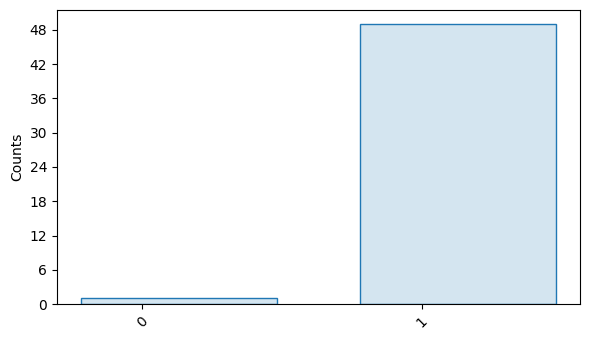

In [3]:
tq.Simulator().add_overrotation(0.04).add_depolarizing(0.01).run(circuits)
circuits[0].results.plot()

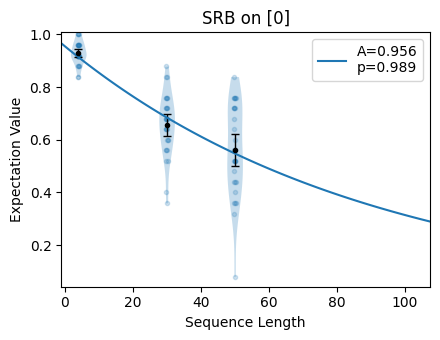

In [4]:
circuits.plot.raw()

In [5]:
circuits.fit()

EstimateCollection(1)

In [6]:
# simultaneous single-qubit RB on qubits 0 and 1; 60 circuits total
circuits = tq.make_srb([0, 1], [4, 100], 30)

# isolated single-qubit RB on qubits 0 and 1; 120 circuits total
circuits = tq.make_srb([0], [4, 100], 30).append(tq.make_srb([1], [4, 100], 30))

# two-qubit RB on 0 and 1, simultaneous with single-qubit RB on 2; 60 circuits total
circuits = tq.make_srb([[0, 1], 2], [4, 100], 30)

In [7]:
# generate a circuit collection
circuits = tq.CircuitCollection()
for pair in [[0, 1], [2, 3], [4, 5]]:
    circuits += tq.make_srb([pair], [4, 12, 32])

In [8]:
# Initialize a simulator
sim = tq.Simulator().add_overrotation(0.01, 0.02)
sim.add_stochastic_pauli(px=0.01, match=tqs.LabelMatch((0, 1)))
sim.add_stochastic_pauli(pz=0.005, match=tqs.LabelMatch((2, 3, 4, 5)))

# initialize a transpiler into native gates (U3 and CNOT)
cnot_factory = tq.config.GateFactory.from_matrix("cnot", tq.Gate.cnot.mat)
config = tq.Config(factories=[tq.config.u3_factory, cnot_factory])
t = tq.Compiler.from_config(config)

# transpile and simulate
circuits = t.compile(circuits)
sim.run(circuits)

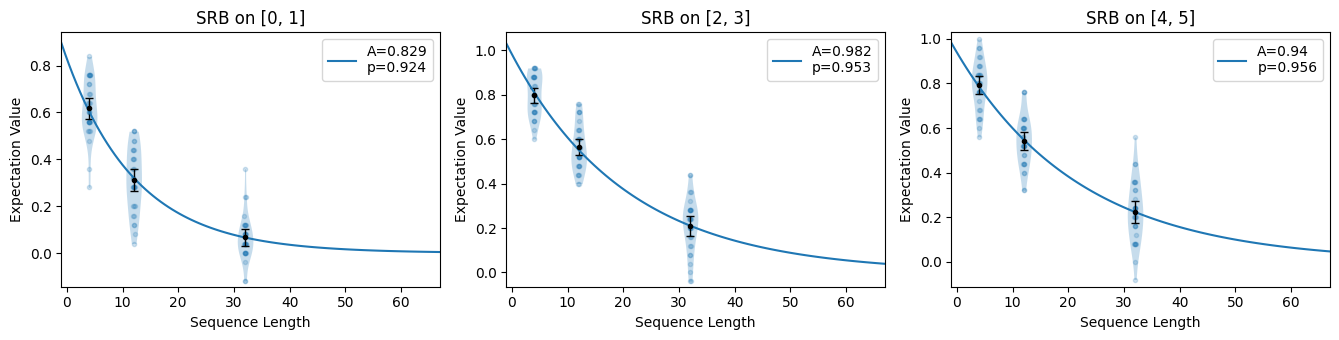

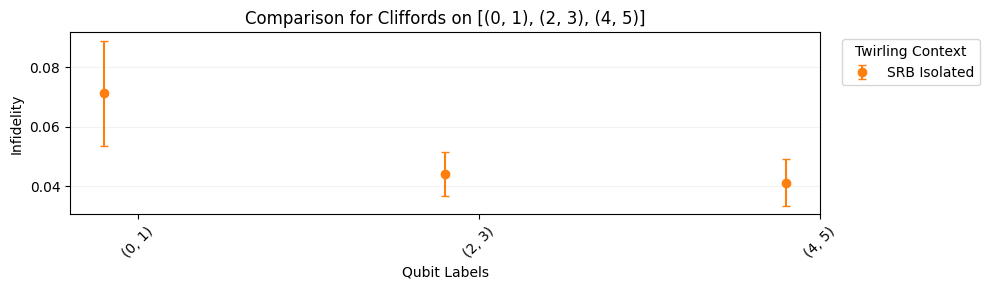

In [9]:
circuits.plot.raw([[0, 1], [2, 3], [4, 5]])
circuits.plot.compare_rb()

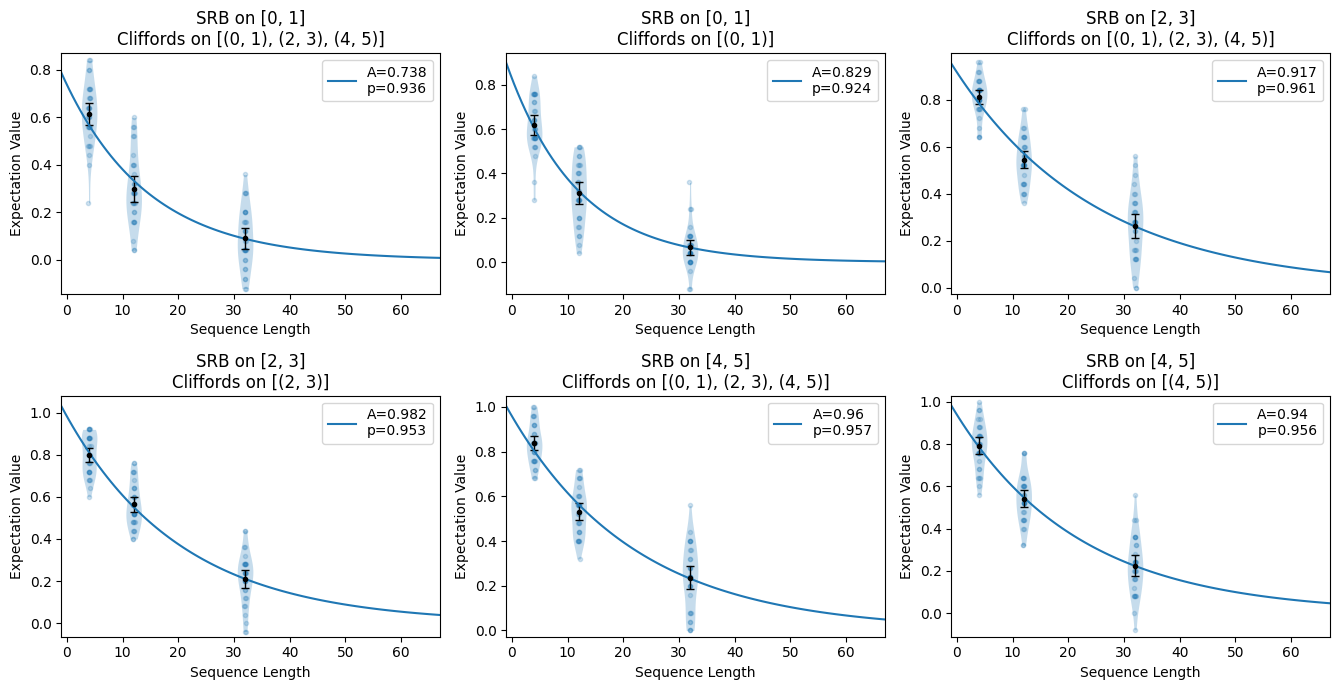

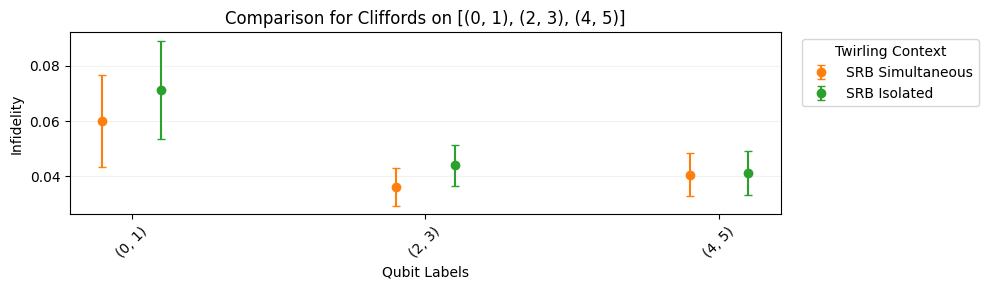

In [10]:
# add simultaneous circuits to our old collection
simul_circuits = t.compile(tq.make_srb([[0, 1], [2, 3], [4, 5]], [4, 12, 32]))
circuits += simul_circuits
sim.run(simul_circuits)

# plot the results
circuits.plot.raw([[0, 1], [2, 3], [4, 5]])
circuits.plot.compare_rb()

In [11]:
su_circuits = tq.make_srb(tq.Twirl("U", [[0, 1], [2, 3], [4, 5]]), [2, 8, 16])
su_circuits = t.compile(su_circuits)
sim.run(su_circuits)

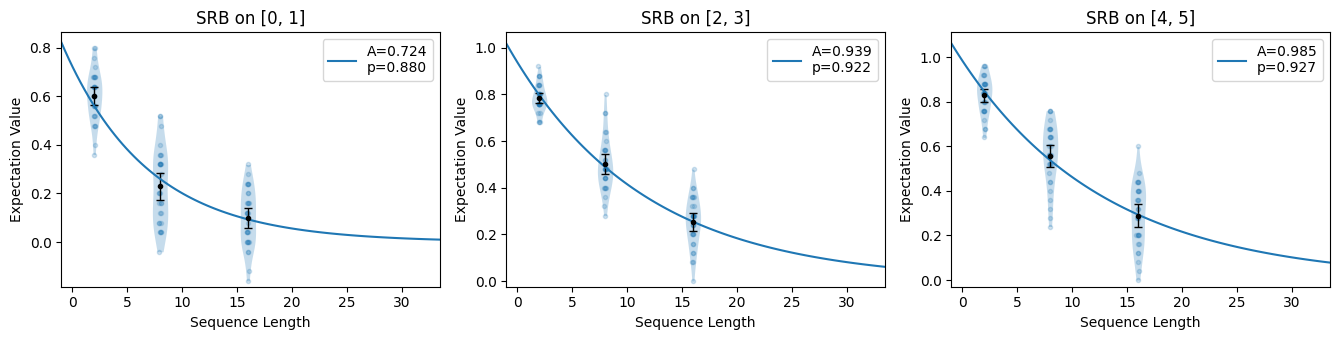

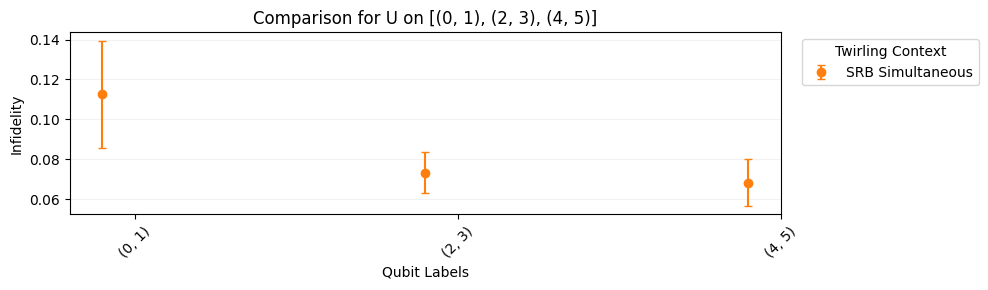

In [12]:
su_circuits.plot.raw([[0, 1], [2, 3], [4, 5]])
su_circuits.plot.compare_rb()

In [13]:
tq.settings.set_dim(3)

circuits = tq.make_srb(0, [4, 32, 64])

# display a sample circuit
circuits[0]

Circuit(Cycle((0,): Gate(<matrix>), marker=1),Cycle((0,): Gate(<matrix>), marker=2),Cycle((0,): Gate(<matrix>), marker=3),Cycle((0,): Gate(<matrix>), marker=4),Cycle((0,): Gate.f3, marker=5),Cycle((0,): Meas(), marker=6))

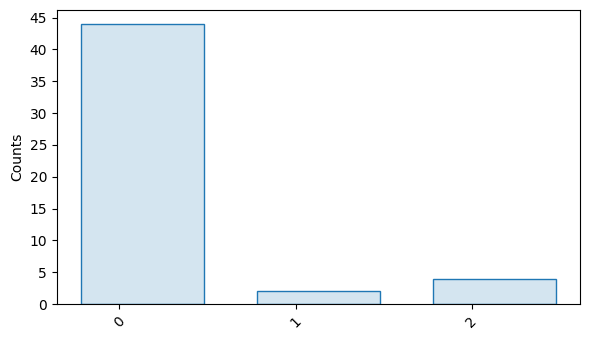

In [14]:
tq.Simulator().add_overrotation(0.04).add_depolarizing(0.02).run(circuits)

circuits[0].results.plot()

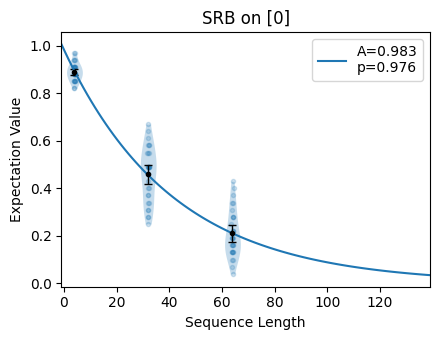

In [15]:
circuits.plot.raw()

In [16]:
circuits.fit()

EstimateCollection(1)